## Data Preprocessing

---

## Childhood Respiratory Disease

Keywords: polynomial regression, multiple regression.

## Description

FEV (forced expiratory volume) is an index of pulmonary function that measures the volume of air expelled after one second of constant effort. The data contains determinations of FEV on 654 children ages 6-22 who were seen in the Childhood Respiratory Desease Study in 1980 in East Boston, Massachusetts. The data are part of a larger study to follow the change in pulmonary function over time in children.

ID	 - 	ID number
Age	 - 	years
FEV	 - 	litres
Height	 - 	inches
Sex	 - 	Male or Female
Smoker	 - 	Non = nonsmoker, Current = current smoker


## Source

Tager, I. B., Weiss, S. T., Rosner, B., and Speizer, F. E. (1979). Effect of parental cigarette smoking on pulmonary function in children. American Journal of Epidemiology, 110, 15-26.
Rosner, B. (1990). Fundamentals of Biostatistics, 3rd Edition. PWS-Kent, Boston, Massachusetts.

---

In [8]:
#Import Dependencies
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load CSV data into pandas Dataframe

smoking = pd.read_csv('../dataset/smoking.csv')
smoking.head()

,Id,Age,FEV,Height,Sex,Smoker
0,301,9,1.708,57.0,Female,Non
1,451,8,1.724,67.5,Female,Non
2,501,7,1.720,54.5,Female,Non
3,642,9,1.558,53.0,Male,Non
4,901,9,1.895,57.0,Male,Non


In [3]:
#Use Pandas to get_dummies to convert categorical data
smoking = pd.get_dummies(smoking)
smoking.head()

,Id,Age,FEV,Height,Sex_Female,Sex_Male,Smoker_Current,Smoker_Non
0,301,9,1.708,57.0,1,0,0,1
1,451,8,1.724,67.5,1,0,0,1
2,501,7,1.720,54.5,1,0,0,1
3,642,9,1.558,53.0,0,1,0,1
4,901,9,1.895,57.0,0,1,0,1


In [4]:
smoking.columns

Index(['Id', 'Age', 'FEV', 'Height', 'Sex_Female', 'Sex_Male',
       'Smoker_Current', 'Smoker_Non'],
      dtype='object')

In [5]:
#Assign X (data) and y (target)

X = smoking[['Id', 'Age', 'Height', 'Sex_Female', 'Sex_Male',
       'Smoker_Current', 'Smoker_Non']]
y = smoking['FEV'].values.reshape(-1,1)

print(X.shape, y.shape)

(654, 7) (654, 1)


In [6]:
#split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [9]:
#Create a StandardScaler model and fit it to the taining data

from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [10]:
#Transform the training and testing data using the X_scaler andy_scaler model

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [11]:
#Create a Linear Regression Model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [12]:
#Fit the scaled data into the the model
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

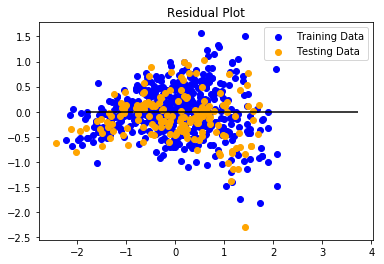

In [13]:
#Make Predictions using the X_test_scaled data
#Plot y_test_scaled vs y_test_scaled
##Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [14]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.22924305606043135, R2: 0.7945077385497898


In [15]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.23070772836860187, R2: 0.7931948140492103


In [16]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.22924374911516224, R2: 0.7945071172991993


In [17]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.23005047313969554, R2: 0.7937839741557756
